### Zadanie 1

Zaimplementuj generator liniowy kongruentny wg wzoru:$$X_{i+1}=(aX_i+c)\ mod\ m$$

Generator ma zwracać wartości w zakresie [0...1], wartości startowe wg własnego wyboru. 
Przetestuj jego działanie dla różnych zestawów parametrów:  a c m  

Zwizualizuj rozkład generowanych liczby (histogram lub lepiej chmura punktów 2-D lub 3D ($X_i, X_{i+1}$), ($X_i, X_{i+1}, X_{i+2}$)). Oceń jakość generowanych rozkładów.  

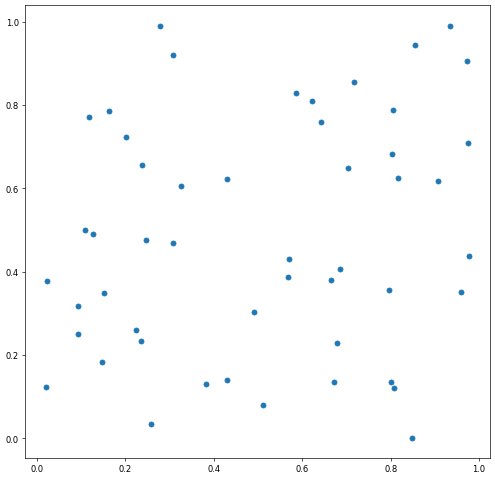

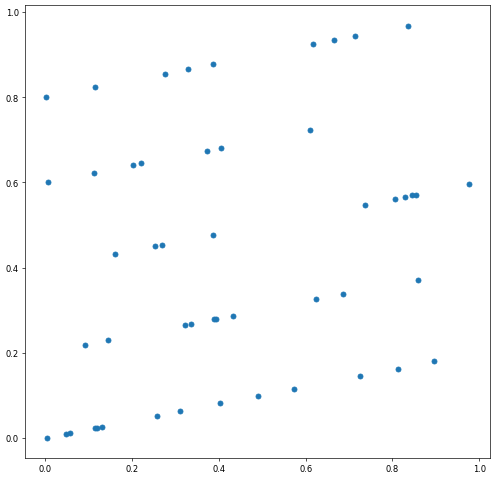

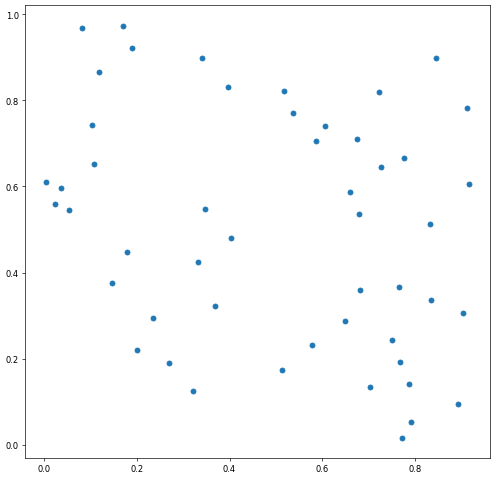

In [10]:
import matplotlib.pyplot as plt

def konRandom(a, c, m, seed):
    return (a * seed + c) % m


def generateRandom(n, a, c, m, seed):
    result = []
    for _ in range(n):
        seed = konRandom(a, c, m, seed)
        result.append(seed/m)
    return result

def display(n,a,c,m,seed):
    plot = generateRandom(n,a,c,m,seed)
    x = [plot[i] for i in range(len(plot)) if i % 2 == 0]
    y = [plot[i] for i in range(len(plot)) if i % 2 == 1]
    plt.figure(figsize=(10, 10), dpi=60)
    plt.scatter(x, y)
    plt.show()

display(100, 1103515245, 12345, 2**32, 10)
display(100, 1229, 1, 2048, 10)
display(100, 1597, 51749, 24494, 10)

### Zadanie 2

Zapoznaj się z generetorem dostępnym w bibliotece numpy. Opisz krótko jaki to generator i jak działa. Przeanalizuj generowany przez niego rozkład podobnie jak w poprzednim zadaniu.  

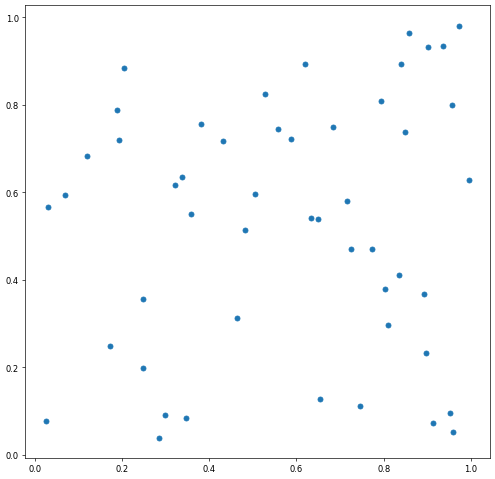

In [12]:
from numpy import random

plot = []

for _ in range(100):
    plot.append(random.random())

x = [plot[i] for i in range(len(plot)) if i % 2 == 0]
y = [plot[i] for i in range(len(plot)) if i % 2 == 1]

plt.figure(figsize=(10, 10), dpi=60)
plt.scatter(x, y)
plt.show()

### Zadanie 3

Zaimplementuj metodą całkowania Monte Carlo i zastosuj ją wobec następujących całek:  
$$ \int_1^2 \frac{1}{x^2}\ dx $$
$$ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx $$
$$ \int_1^{22} x^2+2x\ dx $$
Oblicz także objętości brył:  
- kula o promioniu 5  
- stożek o wysokości 10 i promieniu podstawy 10  
- bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.  

Przeanalizuj jak wybór liczby próbek wpływa na wyniki obliczeń.  

In [13]:
import scipy.integrate as integrate
from tabulate import tabulate
import numpy as np

f1 = lambda x : 1 / (x**2)
f2 = lambda x: 1 / np.sqrt(x**5+8)
f3 = lambda x: x**2 + 2*x

def monteCarlo(f, a, b, n):
    result = 0.0
    for _ in range(n):
        result += f(random.uniform(a, b))
    return (b-a)/float(n)*result

table = [
           ["1 / (x**2)", '(1, 2)', monteCarlo(f1, 1, 2, 1000), integrate.quad(f1, 1, 2)[0]],
           ["1 / np.sqrt(x**5+8)", '(1,6)', monteCarlo(f2, 1, 6, 1000), integrate.quad(f2, 1, 6)[0]],
           ["x**2 + 2*x", '(1, 22)', monteCarlo(f3, 1, 22, 1000), integrate.quad(f3, 1, 22)[0]]
]

print(tabulate(table, headers=['Function', 'Interval', 'Monte Carlo Value', 'Scipy Value'], floatfmt=".8f", tablefmt="fancy_grid"))

╒═════════════════════╤════════════╤═════════════════════╤═══════════════╕
│ Function            │ Interval   │   Monte Carlo Value │   Scipy Value │
╞═════════════════════╪════════════╪═════════════════════╪═══════════════╡
│ 1 / (x**2)          │ (1, 2)     │          0.50334810 │    0.50000000 │
├─────────────────────┼────────────┼─────────────────────┼───────────────┤
│ 1 / np.sqrt(x**5+8) │ (1,6)      │          0.42760929 │    0.43505972 │
├─────────────────────┼────────────┼─────────────────────┼───────────────┤
│ x**2 + 2*x          │ (1, 22)    │       4164.78567007 │ 4032.00000000 │
╘═════════════════════╧════════════╧═════════════════════╧═══════════════╛
